# Preparation

In [379]:
# Download the dataset
!gdown 1oHjJxZom4-Ru5pOnjWK6hUBFkK4kRqSt
!gdown 1lEXEmsEOHZWs5wTkyEFwiRMjmVqgXEjj

Downloading...
From: https://drive.google.com/uc?id=1oHjJxZom4-Ru5pOnjWK6hUBFkK4kRqSt
To: /content/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv
100% 13.2M/13.2M [00:00<00:00, 122MB/s]
Downloading...
From: https://drive.google.com/uc?id=1lEXEmsEOHZWs5wTkyEFwiRMjmVqgXEjj
To: /content/United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv
100% 4.22M/4.22M [00:00<00:00, 115MB/s]


In [380]:
import pandas as pd
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt

In [381]:
vaccination_df = pd.read_csv('COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
case_df = pd.read_csv('United_States_COVID-19_Cases_and_Deaths_by_State_over_Time.csv')
# convert date in csv into datetime object
vaccination_df['Date'] = pd.to_datetime(vaccination_df['Date'])
case_df['submission_date'] = pd.to_datetime(case_df['submission_date'])

# extract and sort the sample data 
vac_co_df = vaccination_df.loc[vaccination_df['Location'] == 'CO'].sort_values('Date')
vac_ar_df = vaccination_df.loc[vaccination_df['Location'] == 'AR'].sort_values('Date')
case_co_df = case_df.loc[case_df['state'] == 'CO'].sort_values('submission_date')
case_ar_df = case_df.loc[case_df['state'] == 'AR'].sort_values('submission_date')

In [382]:
# calculate daily stats of cases dataset
case_co_df['daily_cases'] = case_co_df['tot_cases'].diff()
case_co_df['daily_death'] = case_co_df['tot_death'].diff()
case_ar_df['daily_cases'] = case_ar_df['tot_cases'].diff()
case_ar_df['daily_death'] = case_ar_df['tot_death'].diff()

# rest index of each dataframe
num_case_co = case_co_df[['submission_date', 'daily_cases']]
num_case_co= num_case_co.reset_index(drop=True)

num_death_co = case_co_df[['submission_date', 'daily_death']]
num_death_co= num_death_co.reset_index(drop=True)

num_case_ar = case_ar_df[['submission_date', 'daily_cases']]
num_case_ar= num_case_ar.reset_index(drop=True)

num_death_ar = case_ar_df[['submission_date', 'daily_death']]
num_death_ar= num_death_ar.reset_index(drop=True)

# set daily stats of first day to 0
num_case_co.loc[0:1,'daily_cases'] = 0.0
num_death_co.loc[0:1,'daily_death'] = 0.0
num_case_ar.loc[0:1,'daily_cases'] = 0.0
num_death_ar.loc[0:1,'daily_death'] = 0.0

#Data cleaning and Outlier Detection

In [383]:
def clean_data(data, col):
  #using Tukeys Rule to find outlier of data in target states

  # Find the quartiles
  n = len(data)
  q1 = np.percentile(data[col], 25)
  q3 = np.percentile(data[col], 75)

  # Create the outlier boundaries
  IQR = q3-q1
  upperBound = q3 + 1.5*IQR
  lowerBound = q1 - 1.5*IQR
  df = data.loc[(data[col] <= upperBound) & (data[col]>= lowerBound) | (data[col]==0)]
  
  print('Lowerbound of Tukey\'s Rule:', lowerBound)
  print('Upperbound of Tukey\'s Rule:', upperBound)
  print('Number of outliers found in this dataset', n-len(df))
  return df

## Clean Cases Data


In [384]:
print('Cleaning dataset of daily cases in Colorado')
num_case_co_cleaned = clean_data(num_case_co, 'daily_cases')

Cleaning dataset of daily cases in Colorado
Lowerbound of Tukey's Rule: -1971.75
Upperbound of Tukey's Rule: 4264.25
Number of outliers found in this dataset 64


In [385]:
print('Cleaning dataset of daily death in Colorado')
num_death_co_cleaned = clean_data(num_death_co, 'daily_death')

Cleaning dataset of daily death in Colorado
Lowerbound of Tukey's Rule: -22.0
Upperbound of Tukey's Rule: 42.0
Number of outliers found in this dataset 74


In [386]:
print('Cleaning dataset of daily cases in Arkansas')
num_case_ar_cleaned = clean_data(num_case_ar, 'daily_cases')

Cleaning dataset of daily cases in Arkansas
Lowerbound of Tukey's Rule: -1224.125
Upperbound of Tukey's Rule: 2520.875
Number of outliers found in this dataset 73


In [387]:
print('Cleaning dataset of daily death in Arkansas')
num_death_ar_cleaned = clean_data(num_death_ar, 'daily_death')

Cleaning dataset of daily death in Arkansas
Lowerbound of Tukey's Rule: -25.0
Upperbound of Tukey's Rule: 47.0
Number of outliers found in this dataset 22


## Clean Vaccination Data

In [388]:
# calculate daily vaccine administered
vac_co_df['Daily Administered'] = vac_co_df['Administered'].diff()
vac_ar_df['Daily Administered'] = vac_ar_df['Administered'].diff()

vac_co_df= vac_co_df.reset_index(drop=True)
vac_ar_df= vac_ar_df.reset_index(drop=True)

# extract target column from dataset
vac_co_df = vac_co_df[['Date', 'Daily Administered']]
vac_ar_df = vac_ar_df[['Date', 'Daily Administered']]

# set daily stats of first day to 0
vac_co_df.loc[0:1,'Daily Administered'] = 0.0
vac_ar_df.loc[0:1,'Daily Administered'] = 0.0

In [389]:
print('Clean Dataset of daily vaccine adminstered in Colorado.')
vac_co_cleaned = clean_data(vac_co_df, 'Daily Administered')

Clean Dataset of daily vaccine adminstered in Colorado.
Lowerbound of Tukey's Rule: -26358.25
Upperbound of Tukey's Rule: 64007.75
Number of outliers found in this dataset 17


In [390]:
print('Clean Dataset of daily vaccine adminstered in Arkansas.')
vac_ar_cleaned = clean_data(vac_ar_df, 'Daily Administered')

Clean Dataset of daily vaccine adminstered in Arkansas.
Lowerbound of Tukey's Rule: -11451.0
Upperbound of Tukey's Rule: 25725.0
Number of outliers found in this dataset 25


## Conclusion

Overall, there is no missing value found in the targe column of cases and vaccination dataset. 

# Mandatory Part


## Part A

In [391]:
# Extract Feb and Mar 21 data for CO
case_feb_co = num_case_co_cleaned[(num_case_co_cleaned['submission_date'] >= '2021-02-01')& (num_case_co_cleaned['submission_date'] < '2021-03-01')]['daily_cases']
death_feb_co = num_death_co_cleaned[(num_death_co_cleaned['submission_date'] >= '2021-02-01')& (num_death_co_cleaned['submission_date'] < '2021-03-01')]['daily_death']

case_mar_co = num_case_co_cleaned[(num_case_co_cleaned['submission_date'] >= '2021-03-01')& (num_case_co_cleaned['submission_date'] < '2021-04-01')]['daily_cases']
death_mar_co = num_death_co_cleaned[(num_death_co_cleaned['submission_date'] >= '2021-03-01')& (num_death_co_cleaned['submission_date'] < '2021-04-01')]['daily_death']

In [392]:
# Extract Feb and Mar 21 data for AR
case_feb_ar = num_case_ar_cleaned[(num_case_ar_cleaned['submission_date'] >= '2021-02-01')& (num_case_ar_cleaned['submission_date'] < '2021-03-01')]['daily_cases']
death_feb_ar = num_death_ar_cleaned[(num_death_ar_cleaned['submission_date'] >= '2021-02-01')& (num_death_ar_cleaned['submission_date'] < '2021-03-01')]['daily_death']

case_mar_ar = num_case_ar_cleaned[(num_case_ar_cleaned['submission_date'] >= '2021-03-01')& (num_case_ar_cleaned['submission_date'] < '2021-04-01')]['daily_cases']
death_mar_ar = num_death_ar_cleaned[(num_death_ar_cleaned['submission_date'] >= '2021-03-01')& (num_death_ar_cleaned['submission_date'] < '2021-04-01')]['daily_death']

### Wald's Test

In [393]:
def WaldTest_oneSample(data1, data2):
  guess_mean = np.mean(data1)
  # MLE of poisson distribution is same as sample mean
  est_mean = np.mean(data2)
  n = 31
  # var(poisson) = lambda = sample mean
  # se(lambda_hat) = sqrt(lambda/n)
  W = abs(est_mean-guess_mean)/np.sqrt(est_mean/n)
  if W <= 1.96:
    print('Accet H0 with result of Wald\'s Test: ', W)
  else:
    print('Reject H0 with result of Wald\'s Test: ', W)


In [394]:
# One sample Walds' Test for CO between Feb and Mar
# daily cases

print('One sample Wald\'s Test for daily cases CO between Feb and Mar')
W_case_co = WaldTest_oneSample(case_feb_co, case_mar_co)
print()
print('One sample Wald\'s Test for daily death CO between Feb and Mar')
W_death_co = WaldTest_oneSample(death_feb_co, death_mar_co)


One sample Wald's Test for daily cases CO between Feb and Mar
Reject H0 with result of Wald's Test:  16.215337535205734

One sample Wald's Test for daily death CO between Feb and Mar
Reject H0 with result of Wald's Test:  16.006884708145563


In [395]:
# One sample Walds' Test for AR between Feb and Mar

print('One sample Wald\'s Test for daily cases AR between Feb and Mar')
W_case_ar = WaldTest_oneSample(case_feb_ar, case_mar_ar)
print()
print('One sample Wald\'s Test for daily death AR between Feb and Mar')
W_death_ar = WaldTest_oneSample(death_feb_ar, death_mar_ar)

One sample Wald's Test for daily cases AR between Feb and Mar
Reject H0 with result of Wald's Test:  218.12262399981506

One sample Wald's Test for daily death AR between Feb and Mar
Reject H0 with result of Wald's Test:  12.638142956274537


In [396]:
# Two Sample Wald's Test
def WaldTest_twoSample(data1, data2):
  delta = np.mean(data1) - np.mean(data2)
  n = len(data1)
  m = len(data2)
  se = ((np.mean(data1)/n)+(np.mean(data2)/m))**.5

  W = abs(delta/se)

  if W <= 1.96:
    print('Accet H0 with result of Wald\'s Test: ', W)
  else:
    print('Reject H0 with result of Wald\'s Test: ', W)

In [397]:
print('Two sample Wald\'s Test for daily cases CO between Feb and Mar')
W_case_co = WaldTest_twoSample(case_feb_co, case_mar_co)
print()
print('Two sample Wald\'s Test for daily death CO between Feb and Mar')
W_death_co = WaldTest_twoSample(death_feb_co, death_mar_co)

Two sample Wald's Test for daily cases CO between Feb and Mar
Reject H0 with result of Wald's Test:  10.914216647814197

Two sample Wald's Test for daily death CO between Feb and Mar
Reject H0 with result of Wald's Test:  8.4135108781844


In [398]:
print('Two sample Wald\'s Test for daily cases AR between Feb and Mar')
W_case_co = WaldTest_twoSample(case_feb_ar, case_mar_ar)
print()
print('Two sample Wald\'s Test for daily death AR between Feb and Mar')
W_death_co = WaldTest_twoSample(death_feb_ar, death_mar_ar)

Two sample Wald's Test for daily cases AR between Feb and Mar
Reject H0 with result of Wald's Test:  98.02794111835297

Two sample Wald's Test for daily death AR between Feb and Mar
Reject H0 with result of Wald's Test:  7.434718791280638


### Z-Test

In [399]:
# Implementation of a one-sample Z-Test
def ZTest_OneSample(data1, data2, sig):
  guess_mean = np.mean(data1)
  sample_mean = np.mean(data2)
  n = len(data2)
  Z = abs(sample_mean-guess_mean)/(sig/(n**.5))
  if Z <= 1.96:
    print('Accet H0 with result of Z-Test: ', Z)
  else:
    print('Reject H0 with result of Z-Test: ', Z)

In [400]:
# Z-Test
# One sample Z-test for daily cases for CO between Feb and Mar
print('One sample Z-Test for daily cases CO between Feb and Mar')
Z_case_co = ZTest_OneSample(case_feb_co, case_mar_co, np.std(num_case_co_cleaned['daily_cases']))
print()
print('One sample Z-Test for daily death CO between Feb and Mar')
Z_death_co = ZTest_OneSample(death_feb_co, death_mar_co, np.std(num_death_co_cleaned['daily_death']))


One sample Z-Test for daily cases CO between Feb and Mar
Accet H0 with result of Z-Test:  0.5267032736333611

One sample Z-Test for daily death CO between Feb and Mar
Reject H0 with result of Z-Test:  3.562061556476174


In [401]:
# One sample Z-test for daily cases for CO between Feb and Mar
print('One sample Z-Test for daily cases AR between Feb and Mar')
ZTest_OneSample(case_feb_ar, case_mar_ar, np.std(num_case_ar_cleaned['daily_cases']))
print()
print('One sample Z-Test for daily death AR between Feb and Mar')
ZTest_OneSample(death_feb_ar, death_mar_ar, np.std(num_death_ar_cleaned['daily_death']))

One sample Z-Test for daily cases AR between Feb and Mar
Reject H0 with result of Z-Test:  5.6614407939722025

One sample Z-Test for daily death AR between Feb and Mar
Reject H0 with result of Z-Test:  3.7765837248037695


In [402]:
# Two sample Z-test
def ZTest_twoSample(data1, data2, var):
  delta = np.mean(data1) - np.mean(data2)
  n = len(data1)
  m = len(data2)
  deno = (var/n + var/m)**.5
  Z = abs(delta/deno)
  if Z <= 1.96:
    print('Accet H0 with result of Z-Test: ', Z)
  else:
    print('Reject H0 with result of Z-Test: ', Z)

In [403]:
print('Two sample Z-Test for daily cases CO between Feb and Mar')
ZTest_twoSample(case_feb_co, case_mar_co, np.var(num_case_co_cleaned['daily_cases']))
print()
print('Two sample Z-Test for daily death CO between Feb and Mar')
ZTest_twoSample(death_feb_co, death_mar_co, np.var(num_death_co_cleaned['daily_death']))

Two sample Z-Test for daily cases CO between Feb and Mar
Accet H0 with result of Z-Test:  0.36284323263730744

Two sample Z-Test for daily death CO between Feb and Mar
Reject H0 with result of Z-Test:  2.43035270736499


In [404]:
print('Two sample Z-Test for daily cases AR between Feb and Mar')
ZTest_twoSample(case_feb_ar, case_mar_ar, np.var(num_case_ar_cleaned['daily_cases']))
print()
print('Two sample Z-Test for daily death AR between Feb and Mar')
ZTest_twoSample(death_feb_ar, death_mar_ar, np.var(num_death_ar_cleaned['daily_death']))

Two sample Z-Test for daily cases AR between Feb and Mar
Reject H0 with result of Z-Test:  3.862734470773308

Two sample Z-Test for daily death AR between Feb and Mar
Reject H0 with result of Z-Test:  2.576718659867099


### T-Test

In [405]:
# T-test One sample
def TTest_OneSample(data1, data2):
  guess_mean = np.mean(data1)
  sample_mean = np.mean(data2)
  n = len(data2)
  s = np.std(data2, ddof=1)
  T = abs((sample_mean-guess_mean)/(s/(n**.5)))

  if T <= 2.0423:
    print('Accet H0 with result of T-Test: ', T)
  else:
    print('Reject H0 with result of T-Test: ', T)

In [406]:
# One sample T-test for daily cases for CO between Feb and Mar
print('One sample T-test for daily cases for CO between Feb and Mar')
TTest_OneSample(case_feb_co, case_mar_co)
print()
print('One sample T-test for daily death for CO between Feb and Mar')
TTest_OneSample(death_feb_co, death_mar_co)

One sample T-test for daily cases for CO between Feb and Mar
Accet H0 with result of T-Test:  1.5317556250336444

One sample T-test for daily death for CO between Feb and Mar
Reject H0 with result of T-Test:  8.187911317501678


In [407]:
# One sample T-test for daily cases for CO between Feb and Mar
print('One sample T-test for daily cases for AR between Feb and Mar')
TTest_OneSample(case_feb_ar, case_mar_ar)
print()
print('One sample T-test for daily death for AR between Feb and Mar')
TTest_OneSample(death_feb_ar, death_mar_ar)

One sample T-test for daily cases for AR between Feb and Mar
Reject H0 with result of T-Test:  26.188049084057777

One sample T-test for daily death for AR between Feb and Mar
Reject H0 with result of T-Test:  6.2716269624872965


In [408]:
# Two Sample T-test
def TTest_twoSample(data1, data2):
  n = len(data1)
  m = len(data2)
  delta = np.mean(data1) - np.mean(data2)
  deno = (np.var(data1,ddof=1)/n + np.var(data2, ddof=1)/m)**.5
  T = abs(delta/deno)
  if T <= 2.0025:
    print('Accet H0 with result of T-Test: ', T)
  else:
    print('Reject H0 with result of T-Test: ', T)

In [409]:
print('Two sample T-test for daily cases for CO between Feb and Mar')
TTest_twoSample(case_feb_co, case_mar_co)
print()
print('Two sample T-test for daily death for CO between Feb and Mar')
TTest_twoSample(death_feb_co, death_mar_co)


Two sample T-test for daily cases for CO between Feb and Mar
Accet H0 with result of T-Test:  1.115618985082873

Two sample T-test for daily death for CO between Feb and Mar
Reject H0 with result of T-Test:  4.027249758470368


In [410]:
print('Two sample T-test for daily cases for AR between Feb and Mar')
TTest_twoSample(case_feb_ar, case_mar_ar)
print()
print('Two sample T-test for daily death for AR between Feb and Mar')
TTest_twoSample(death_feb_ar, death_mar_ar)

Two sample T-test for daily cases for AR between Feb and Mar
Reject H0 with result of T-Test:  5.129267029763564

Two sample T-test for daily death for AR between Feb and Mar
Reject H0 with result of T-Test:  2.9020278794409884


### Discussion

For Wald's Test, Although we use MLE for it and it is asymptotically normal. But the number of sample data does not tend to infinity.

For Z-Test, the main assumption is either the sample data is normally distributed or size of sample data is large, greater or equal to 30. Since we are testing the mean of daily stats of March to Feburary. We have size of sample data greater than 30, Z-test is applicable.


For T-test, it requires the data follow normal distribution. Since the sample data is not, so T test is not applicable.

## Part B

In [411]:
#extract last three months data of CO and AR
case_21_co = num_case_co_cleaned[(num_case_co_cleaned['submission_date'] >= '2021-10-01')& (num_case_co_cleaned['submission_date'] < '2022-01-01')]['daily_cases'].to_numpy()
death_21_co = num_death_co_cleaned[(num_death_co_cleaned['submission_date'] >= '2021-10-01')& (num_death_co_cleaned['submission_date'] < '2022-01-01')]['daily_death'].to_numpy()
case_21_ar = num_case_ar_cleaned[(num_case_ar_cleaned['submission_date'] >= '2021-10-01')& (num_case_ar_cleaned['submission_date'] < '2022-01-01')]['daily_cases'].to_numpy()
death_21_ar = num_death_ar_cleaned[(num_death_ar_cleaned['submission_date'] >= '2021-10-01')& (num_death_ar_cleaned['submission_date'] < '2022-01-01')]['daily_death'].to_numpy()

### K-S Test

In [412]:

# Poisson lambda_MME = sample mean
# Geometric p_MME = 1/sample mean
# Binomial p_MME = 1- (sample variance/ sample mean)
# n_MME = sample mean/p_MME
def KS_test_OneSample(data1, data2, dist):
  data_sorted = np.sort(data2)
  ecdf = np.arange(1/len(data2), 1+1/len(data2), 1/len(data2))
  if dist=='poisson':
    mu_mme = np.mean(data1)
    guess_dist = [st.poisson.cdf(x, mu_mme) for x in data_sorted]
  elif dist =='geom':
    p_mme = 1/np.mean(data1)
    guess_dist = [st.geom.cdf(x, p_mme) for x in data_sorted]
  elif dist == 'bino':
    p_mme = 1-(np.var(data1)/np.mean(data1))
    n_mme = np.mean(data1)/p_mme
    guess_dist = [st.binom.cdf(x, n_mme, p_mme) for x in data_sorted]

  d = max(np.abs(ecdf-guess_dist))
  print('The max d =', d)
  if d > 0.05:
    print('Reject Null Hypothesis.')
  else:
    print('Accept Null Hypothesis.')


In [413]:
for i in [(case_21_co, case_21_ar), (death_21_co, death_21_ar)]:
  for j in ['poisson', 'geom', 'bino']:
    print(j)
    KS_test_OneSample(i[0],i[1], j)
    print()
  print()

poisson
The max d = 0.9887640449438202
Reject Null Hypothesis.

geom
The max d = 0.5837416139421251
Reject Null Hypothesis.

bino
The max d = 0.9887640449438202
Reject Null Hypothesis.


poisson
The max d = 0.32098151692519294
Reject Null Hypothesis.

geom
The max d = 0.19394728466640576
Reject Null Hypothesis.

bino
The max d = 0.989010989010989
Reject Null Hypothesis.




In [414]:
# Perform a Two-Sample KS Test
def KS_test_TwoSample(data1, data2):
  if len(data1) > len(data2):
    data1, data2 = data2, data1
  data1_sorted = np.sort(data1)
  data2_sorted = np.sort(data2)
  d1 = [st.percentileofscore(data1_sorted, x)/100 for x in data1_sorted]
  d2 = [st.percentileofscore(data2_sorted, x)/100 for x in data1_sorted]
  d = max(np.abs(np.subtract(d1, d2)))
  print('The max d =', d)
  if d > 0.05:
    print('Reject Null Hypothesis.')
  else:
    print('Accept Null Hypothesis.')

KS_test_TwoSample(case_21_co, case_21_ar)

The max d = 0.9409427240339818
Reject Null Hypothesis.


In [415]:
KS_test_TwoSample(death_21_co, death_21_ar)

The max d = 0.3099885189437429
Reject Null Hypothesis.


### Permutation Test

In [416]:
# As a subpiece to the Permutation Test
# calculate the 
def run_permutation_test(data, n):
  np.random.shuffle(data)
  d1 = data[:n]
  d2 = data[n:]

  t = abs(np.mean(d1) - np.mean(d2))
  return t

# Perform a permutation test between the two datasets
def permutation_test(data1, data2):
  n, m = len(data1), len(data2)
  t_obs = abs(np.mean(data1)-np.mean(data2))
  total = np.append(data1, data2)
 
  diff = len(list(filter(lambda x: x> t_obs, map(lambda y: run_permutation_test(total, n), range(1000)))))
  p = diff/1000.0
  print('p-vale for permutation test:', p)
  print('When n = 1000')
  if p > 0.05:
      print('Accepted Null Hypothesis')
  else:
      print('Rejected Null Hypothesis')


In [417]:
# permutaion test for daily case in CO and AR
permutation_test(case_21_co, case_21_ar)

p-vale for permutation test: 0.0
When n = 1000
Rejected Null Hypothesis


In [418]:
permutation_test(death_21_co, death_21_ar)

p-vale for permutation test: 0.016
When n = 1000
Rejected Null Hypothesis


## Part C

In [419]:
total = pd.concat([num_death_co_cleaned, num_death_ar_cleaned,num_case_co_cleaned,num_case_ar_cleaned]).sort_values('submission_date').groupby('submission_date',as_index=False).sum()

In [420]:
total['sum'] = total['daily_cases']+total['daily_death']

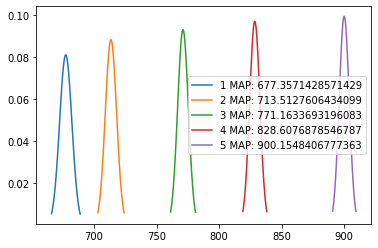

In [421]:
# Exp = Gamma(1, λ)
# If our data X1, . . . ,Xn are iid Poisson(λ), then a gamma(α, β) prior on  is a conjugate prior.
# posterior = gamma(sum(x)+α, len(x)+β), where α = 1 and β = λ
dates = [['2020-06-01', '2020-06-29'],['2020-06-29', '2020-07-06'],['2020-07-06','2020-07-13'],['2020-07-13','2020-07-20'],['2020-07-20','2020-07-27']]
alpha, beta =1, 0
def bayesInf(data, dates, alpha, beta):
  for i, j in enumerate(dates):
    d = data[(data['submission_date']>=j[0]) & (data['submission_date']<j[1])]['sum'].to_numpy()
    if i == 0:
      beta = 1/np.mean(d)
    a = np.sum(d) + alpha
    b = len(d) + beta

    alpha, beta = a,b
    x = np.linspace(st.gamma.ppf(0.01, a, scale=1/b),
              st.gamma.ppf(0.99, a, scale=1/b), 100)
    plt.plot(x, st.gamma.pdf(x, a, scale=1/b), label=f'{i+1} MAP: {a/b}')
  plt.legend()
  plt.show()

bayesInf(total, dates,alpha, beta)

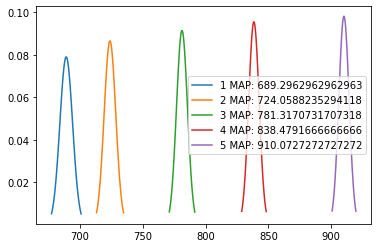

In [422]:
dates = ['2020-06-29', '2020-07-06','2020-07-13','2020-07-20','2020-07-27']

def bayesInf(data, dates, alpha, beta):
  for i, j in enumerate(dates):
    d = data[(data['submission_date']>'2020-06-01') & (data['submission_date']<j)]['sum'].to_numpy()
    a = np.sum(d) + 1
    b = len(d) + 1/np.mean(d)

    alpha, beta = a,b
    x = np.linspace(st.gamma.ppf(0.01, a, scale=1/b),
              st.gamma.ppf(0.99, a, scale=1/b), 100)
    plt.plot(x, st.gamma.pdf(x, a, scale=1/b), label=f'{i+1} MAP: {a/b}')
  plt.legend()
  plt.show()

bayesInf(total, dates,alpha, beta)

## Part D

In [423]:
def AR(data, t):
  #extract the training data
  samp = data[(data['Date'] >= '2021-05-01')& (data['Date'] < '2021-05-29')]['Daily Administered'].to_numpy()

  y_train = samp[t:21]
  y_train = y_train.reshape(-1,1)

  x_train = []

  #create matrix for MLR
  for i in range(21-t):
    temp = []
    for j in range(t-1,-1,-1):
      temp.append(samp[i+j])
    x_train.append(temp)

  x_train = np.array(x_train)
  x_train_T = x_train.transpose()

  #calculate beta_hat
  beta_hat = np.matmul(np.linalg.inv(np.matmul(x_train_T, x_train)),np.matmul(x_train_T, y_train))

  input = samp[len(samp)-(7+t-1):]

  x= []
  for i in range(7):
    temp = []
    for j in range(t-1,-1,-1):
      temp.append(input[i+j])
    x.append(temp)

  y_p = np.matmul(x, beta_hat)

  y = samp[-7:]
  y_p=y_p.ravel()

  print('Real value of y:', y)
  print('Predict value of y:',y_p)
  
  mape = 0
  mse = 0
  for i, j in zip(y, y_p):
    mape += abs(i-j)/i
    mse += (i-j)**2
  
  mape = mape/7*100
  mse = mse/7
  print(f'MAPE: {round(mape,2)}%\nSSE: {mse}\n')


In [424]:
AR(vac_co_cleaned, 3)

Real value of y: [ 1933. 32323. 17252. 25360. 30459. 26579. 31154.]
Predict value of y: [ 7146.0814922  39046.15952908  6782.25598024 28389.72870152
 25268.48172531 23467.75185594 30188.19484083]
MAPE: 56.42%
SSE: 32675144.731596123



In [425]:
AR(vac_ar_cleaned, 3)

Real value of y: [12951.  9433.  4516.  2394.  9665.  8909.  8115.]
Predict value of y: [11945.42896375  8339.68423668  5611.70697054  4425.88947015
 10994.38901208  5247.93658972  8181.95357582]
MAPE: 26.31%
SSE: 3244400.610330465



In [426]:
AR(vac_ar_cleaned, 5)

Real value of y: [12951.  9433.  4516.  2394.  9665.  8909.  8115.]
Predict value of y: [ 9892.80038557  6142.92502592  5331.03411388  4970.89678906
 14074.58598089  3967.05459271  9822.63545348]
MAPE: 43.76%
SSE: 10609306.808366807



In [427]:
AR(vac_co_cleaned, 5)

Real value of y: [ 1933. 32323. 17252. 25360. 30459. 26579. 31154.]
Predict value of y: [ 5522.96513438 34429.93115638 17303.00179923 23663.51354647
 24157.9185137  23440.90686539 26885.98705273]
MAPE: 35.06%
SSE: 12567838.138706962



In [428]:
# Calculate the EWMA
def EWMA(data, alpha):
  # Get the sample data
  samp = data[(data['Date'] >= '2021-05-01')& (data['Date'] < '2021-05-29')]['Daily Administered'].to_numpy()
  
  # Need to use -7: here instead of 21: because some of the days in the first three
  # weeks could have been outliers and thus been removed.
  y = samp[-7:]

  # Predict follow-up values for y using EWMA 
  y_p = [0]*len(y)
  y_p[0] = y[0]
  for i in range(1, len(y)):
    y_p[i] = alpha*y[i-1]+(1-alpha)*y_p[i-1]

  print('Real value of y:', y)
  print('Predict value of y:',y_p)

  # Calculate the errors between the prediction and the actual y values
  mape = 0
  mse = 0
  for i, j in zip(y, y_p):
    mape += abs(i-j)/i
    mse += (i-j)**2
  
  mape = mape/7*100
  mse = mse/7
  print(f'MAPE: {round(mape,2)}%\nSSE: {mse}\n')


In [429]:
EWMA(vac_co_cleaned, 0.5)

Real value of y: [ 1933. 32323. 17252. 25360. 30459. 26579. 31154.]
Predict value of y: [1933.0, 1933.0, 17128.0, 17190.0, 21275.0, 25867.0, 26223.0]
MAPE: 25.09%
SSE: 157069133.85714287



In [430]:
EWMA(vac_co_cleaned, 0.8)

Real value of y: [ 1933. 32323. 17252. 25360. 30459. 26579. 31154.]
Predict value of y: [1933.0, 1933.0, 26245.0, 19050.6, 24098.12, 29186.824, 27100.5648]
MAPE: 30.68%
SSE: 158275222.09571072



In [431]:
EWMA(vac_ar_cleaned, 0.5)

Real value of y: [12951.  9433.  4516.  2394.  9665.  8909.  8115.]
Predict value of y: [12951.0, 12951.0, 11192.0, 7854.0, 5124.0, 7394.5, 8151.75]
MAPE: 68.23%
SSE: 15667520.25892857



In [432]:
EWMA(vac_ar_cleaned, 0.8)

Real value of y: [12951.  9433.  4516.  2394.  9665.  8909.  8115.]
Predict value of y: [12951.0, 12951.0, 10136.6, 5640.12, 3043.2239999999997, 8340.6448, 8795.32896]
MAPE: 54.37%
SSE: 14162650.847965388



## Part E

In [433]:
vac_sep21_co = vac_co_cleaned[(vac_co_cleaned['Date'] >= '2021-09-01')& (vac_co_cleaned['Date'] < '2021-10-01')]['Daily Administered'].to_numpy()
vac_sep21_ar = vac_ar_cleaned[(vac_ar_cleaned['Date'] >= '2021-09-01')& (vac_ar_cleaned['Date'] < '2021-10-01')]['Daily Administered'].to_numpy()

vac_nov21_co = vac_co_cleaned[(vac_co_cleaned['Date'] >= '2021-11-01')& (vac_co_cleaned['Date'] < '2021-12-01')]['Daily Administered'].to_numpy()
vac_nov21_ar = vac_ar_cleaned[(vac_ar_cleaned['Date'] >= '2021-11-01')& (vac_ar_cleaned['Date'] < '2021-12-01')]['Daily Administered'].to_numpy()

In [434]:
def pairedTtest(data1, data2):
  d = [i-j for i, j in zip(data1, data2)]
  n = len(data1)
  mean = np.mean(d)
  s = np.std(d)
  T = mean/(s/n**.5)
  if T <= st.t.ppf(q=1-.05/2,df=len(data1)-1):
    print('Accet H0 with result of T-Test: ', T)
  else:
    print('Reject H0 with result of T-Test: ', T)

In [435]:
print('Paired T-test for number of vaccine daily administered in CO and AR for Sep.')
pairedTtest(vac_sep21_co,vac_sep21_ar)

Paired T-test for number of vaccine daily administered in CO and AR for Sep.
Reject H0 with result of T-Test:  5.2594134699214266


In [436]:
print('Paired T-test for number of vaccine daily administered in CO and AR for Nov.')
pairedTtest(vac_nov21_co,vac_nov21_ar)

Paired T-test for number of vaccine daily administered in CO and AR for Nov.
Reject H0 with result of T-Test:  6.664397605626252


### Observation

From these two T-tests, we observe that the average daily vaccinations between Arkansas and Colorado do not seem to correlate. This holds for both September and November. This could potentially be a result of the population disparity between the two states, as Colorado has a population around 5.7 million, as compared to Arkansas's approximately 3 million. It could also imply that residents of Colorado and Arkansas had differing views on vaccination.

# Exploratory Part

## Preparation

In [437]:
# Download dataset for exploratory Part
!gdown 1LkHgowiXxTY5AiShYunHmX70MirkRb2Y

Downloading...
From: https://drive.google.com/uc?id=1LkHgowiXxTY5AiShYunHmX70MirkRb2Y
To: /content/Metro_mlp_uc_sfrcondo_sm_week.csv
100% 207k/207k [00:00<00:00, 59.6MB/s]


In [438]:
# extract listing data of specified state from 2020-10-03 to 2021-05-29 from listing data
def extractListingData(data, state):
  df = data[data['StateName'] == state]
  df= df.loc[:,"2020-10-03":"2021-05-29"]
  l = []
  for col in df.columns:
    l.append(df[col].mean())
  return l

In [439]:
# The target data is weekly stats/vaccination in the time frame between 10/2020 to 5/2021
listingData = pd.read_csv('Metro_mlp_uc_sfrcondo_sm_week.csv')
CO_listing = extractListingData(listingData, 'CO')
AR_listing = extractListingData(listingData, 'AR')

In [440]:
# extract weekly data from 2020-09-28 to 2021-05-29 from case and vaccination dataset
def extractWeeklyStat(data, col, stat):
  df = data.set_index(col)
  df = df.loc['2020-09-28':"2021-05-29",:]
  df['Week_Number'] = df.index.week
  df['Year'] = df.index.year
  #return df
  df2 = df.groupby(['Year','Week_Number']).sum()
  return df2[stat].to_numpy()[:-1]

In [441]:
# These dataset has length of 35, start at 9/2820, end at 5/29/21
CO_case_weekly = extractWeeklyStat(num_case_co_cleaned, 'submission_date', 'daily_cases')
CO_death_weekly = extractWeeklyStat(num_death_co_cleaned, 'submission_date', 'daily_death')
AR_case_weekly = extractWeeklyStat(num_case_ar_cleaned, 'submission_date', 'daily_cases')
AR_death_weekly = extractWeeklyStat(num_death_ar_cleaned, 'submission_date', 'daily_death')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


In [442]:
# The start date of vaccination is 12/14/20, the the length of output is 24, less than 35  
CO_vac_weekly = extractWeeklyStat(vac_co_cleaned, 'Date', 'Daily Administered')
AR_vac_weekly = extractWeeklyStat(vac_ar_cleaned, 'Date', 'Daily Administered')


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """


## Inference 1


 For each inference you propose, provide a paragraph of text to explain why this inference is practical and useful. Also comment on the results of your inference, as appropriate. For each inference, use parameters that seem reasonable and explain why you are using those parameters. Where possible, comment on whether your inference technique is applicable. 

H0: Confirmed weekly cases and deaths caused by Covid-19 and house listing price are nto correlated

H1: Confirmed weekly cases and deaths caused by Covid-19 and house listing price are not nto correlated

In this inference, we are inferencing the relationship between the house listing price and confirmed cases and death caused by Covid-19 on the Colorado and Arkansas. This inference is practical and useful because the housing market can have substantial influence on the direction of the overall economy. Sustained declines in housing starts slow the economy and can push it into a recession. Likewise, increases in housing activity triggers economic growth. By inferencing the relationship between these two dataset, we can have a perspective on how does Covid affect the economic of each state.

In [443]:
# Calculate the Pearon Correlation between two variables
def pearsonCorrelation(x, y):
  # Compute the metric
  mean_x = np.mean(x)
  mean_y = np.mean(y)
  numer = np.sum([(i-mean_x)*(j-mean_y) for i, j in zip(x,y)])/len(x)
  deno = np.std(x) * np.std(y)

  res = abs(numer/deno)
  print('delta_xy:', res)

  # We are using a cutoff of 0.5 for positive correlation
  # and -0.5 for negative correlation
  # We output an acceptance or rejection accordingly
  if res > 0.5:
    print('Reject H0, These two datasets are positive linearly correlated.')
  elif res<-0.5:
    print('Reject H0, These two datasets are negative linearly correlated.')
  else:
    print('Accept H0, These two datasets are not linearly correlated.')


In [444]:
print('Relationship between house listing  price and weekly confirmed cases in Colorado for 10/20 to 05/21.')
pearsonCorrelation(CO_case_weekly, CO_listing)
print()
print('Relationship between house listing  price and weekly confirmed cases in Arkansas for 10/20 to 05/21.')
pearsonCorrelation(AR_case_weekly, AR_listing)
print()
print('Relationship between house listing  price and weekly death in Colorado for 10/20 to 05/21.')
pearsonCorrelation(CO_death_weekly, CO_listing)
print()
print('Relationship between house listing  price and weekly death in Arkansas for 10/20 to 05/21.')
pearsonCorrelation(AR_death_weekly, AR_listing)

Relationship between house listing  price and weekly confirmed cases in Colorado for 10/20 to 05/21.
delta_xy: 0.3047830584977027
Accept H0, These two datasets are not linearly correlated.

Relationship between house listing  price and weekly confirmed cases in Arkansas for 10/20 to 05/21.
delta_xy: 0.7169612950502718
Reject H0, These two datasets are positive linearly correlated.

Relationship between house listing  price and weekly death in Colorado for 10/20 to 05/21.
delta_xy: 0.16012151334470712
Accept H0, These two datasets are not linearly correlated.

Relationship between house listing  price and weekly death in Arkansas for 10/20 to 05/21.
delta_xy: 0.7767019566742587
Reject H0, These two datasets are positive linearly correlated.


It applicable to apply Pearson's Correlation test, we used the plug-in estimator to perform the test. Based on the results from the Pearson's Correlation test, we conclude that median house listing data is positive linearly correlated with the weekly cases and deaths of Covid-19 in Arkansas. But for Colorado, it is not same case. The population and location of state can be one of the reason, which will need further investigation.

## Inference 2
We shall perform a two sample K-S test on the distribution of median home prices in the timeframe from 10/20 to 5/21 with weekly cases/deaths/vaccination datasets.

$H_0$: The distribution of listing prices matches the selected distribution using the selected MME as a parameter.

$H_1$: The distribution of listing prices does not match the selected distribution.


In [445]:
CO_listing_cases = np.divide(CO_listing, 100) 
CO_listing_deaths = np.divide(CO_listing, 10000)
CO_listing_vac = np.divide(CO_listing, 1000)

# K-S test using weekly cases 
print("CO K-S test scaled for cases")
KS_test_TwoSample(CO_case_weekly, CO_listing_cases)
print() 

# K-S test using weekly deaths 
print("CO K-S test scaled for deaths")
KS_test_TwoSample(CO_death_weekly, CO_listing_deaths)
print() 

# K-S test using weekly vaccinations
print("CO K-S test scaled for vaccinations")
KS_test_TwoSample(CO_vac_weekly, CO_listing_vac)
print() 


AR_listing_cases = np.divide(AR_listing, 100) 
AR_listing_deaths = np.divide(AR_listing, 10000)
AR_listing_vac = np.divide(AR_listing, 1000)

# K-S test using weekly cases
print("AR K-S test scaled for cases")
KS_test_TwoSample(AR_case_weekly, AR_listing_cases)
print() 

# K-S test using weekly deaths
print("AR K-S test scaled for deaths")
KS_test_TwoSample(AR_death_weekly, AR_listing_deaths)
print() 


# K-S test using weekly vaccination
print("AR K-S test scaled for vaccinations")
KS_test_TwoSample(AR_vac_weekly, AR_listing_vac)
print() 


CO K-S test scaled for cases
The max d = 0.8285714285714285
Reject Null Hypothesis.

CO K-S test scaled for deaths
The max d = 0.4857142857142857
Reject Null Hypothesis.

CO K-S test scaled for vaccinations
The max d = 0.9583333333333334
Reject Null Hypothesis.

AR K-S test scaled for cases
The max d = 0.5714285714285714
Reject Null Hypothesis.

AR K-S test scaled for deaths
The max d = 0.8571428571428571
Reject Null Hypothesis.

AR K-S test scaled for vaccinations
The max d = 0.9166666666666666
Reject Null Hypothesis.



###Inference 2 Conclusion:

Based on these results, we see that none of the covid statistic distributions match up with the house listing distribution 

## Inference 3

H0 -- Distribution are independent 

H1 -- Distribution are dependent

In [446]:
from scipy import stats
def chi_sq_test(data,x,y):

    #Actual observed count for each category
    observed = data[[x,y]]
    observed.loc['Sum_Col']= observed.sum(numeric_only=True, axis=0)
    observed.loc[:,'Sum_Row'] = observed.sum(numeric_only=True, axis=1)

    #Expected count based on distribution of the values of the corresponding category 
    expected = pd.DataFrame(columns=[x,y])


  
    for column in expected.columns:
        for j in observed.index:
            expected.loc[j,column] = (observed.loc[j,'Sum_Row'] * observed.loc['Sum_Col', column])/observed.loc['Sum_Col','Sum_Row']
  
    #Chi-squared statistic formula 
    chi_score = np.sum(np.square(np.array((observed.iloc[:-1,:-1] - expected.iloc[:-1,:])).flatten())/np.array(expected.iloc[:-1,:]).flatten())

    print(f"{x} VS {y}")
    print(chi_score)
    
    print("---------------------")
    

    degrees_freedom =len(observed) - 2 # One of these rows is a sum row, so we subtract 2 instead of 1.

    #Critcal value for 95% confidence level; df = (number of variable features - 1)*(number of rows - 1)
    critical = stats.chi2.ppf(q = 0.95, df = degrees_freedom)
    
    print("Critical value")
    print(critical)
    
    p_value = 1 -stats.chi2.cdf(x = chi_score, df= degrees_freedom )
    
    print("P value")
    print(p_value)

In [447]:
CO_case_weekly_df = pd.DataFrame(CO_case_weekly)  
CO_case_weekly_df.columns = ['Weekly_cases']

In [448]:
CO_listing_df = pd.DataFrame(CO_listing)   
CO_listing_df.columns = ['Median_prices']

In [449]:
CO_case_merge = CO_listing_df.join(CO_case_weekly_df)

In [450]:
chi_sq_test(CO_case_merge, 'Median_prices', 'Weekly_cases')

Median_prices VS Weekly_cases
76253.3202571155
---------------------
Critical value
48.602367367294164
P value
0.0


With the p-value < .05, Median prices and weekly cases distribution are dependent. Therefore, we reject H0.

In [451]:
CO_death_weekly_df = pd.DataFrame(CO_death_weekly)  
CO_death_weekly_df.columns = ['Weekly_death']

AR_case_weekly_df = pd.DataFrame(AR_case_weekly)  
AR_case_weekly_df.columns = ['Weekly_cases']

AR_death_weekly_df = pd.DataFrame(AR_death_weekly)  
AR_death_weekly_df.columns = ['Weekly_death']

AR_listing_df = pd.DataFrame(AR_listing)   
AR_listing_df.columns = ['Median_prices']

CO_vac_weekly_df = pd.DataFrame(CO_vac_weekly)  
CO_vac_weekly_df.columns = ['Weekly_Administered']

AR_vac_weekly_df = pd.DataFrame(AR_vac_weekly)  
AR_vac_weekly_df.columns = ['Weekly_Administered']

In [452]:

CO_death_merge = CO_listing_df.join(CO_death_weekly_df)


AR_case_merge = AR_listing_df.join(AR_case_weekly_df)


AR_death_merge = AR_listing_df.join(AR_death_weekly_df)


CO_vac_merge = CO_listing_df.join(CO_vac_weekly_df)


AR_vac_merge = AR_listing_df.join(AR_vac_weekly_df)

In [453]:
CO_vac_merge = CO_vac_merge.dropna()
AR_vac_merge = AR_vac_merge.dropna()

In [454]:
chi_sq_test(CO_death_merge, 'Median_prices', 'Weekly_death')

Median_prices VS Weekly_death
596.9565061793479
---------------------
Critical value
48.602367367294164
P value
0.0


In [455]:
chi_sq_test(AR_case_merge, 'Median_prices', 'Weekly_cases')

Median_prices VS Weekly_cases
102281.44119594814
---------------------
Critical value
48.602367367294164
P value
0.0


In [456]:
chi_sq_test(AR_death_merge, 'Median_prices', 'Weekly_death')

Median_prices VS Weekly_death
1396.4543793964258
---------------------
Critical value
48.602367367294164
P value
0.0


In [457]:
chi_sq_test(CO_vac_merge, 'Median_prices', 'Weekly_Administered')

Median_prices VS Weekly_Administered
682785.7563466032
---------------------
Critical value
35.17246162690806
P value
0.0


In [458]:
chi_sq_test(AR_vac_merge, 'Median_prices', 'Weekly_Administered')

Median_prices VS Weekly_Administered
397899.05080671783
---------------------
Critical value
35.17246162690806
P value
0.0


All the feature combinations are dependent. with chi-square test, we get p-value < .05 (actual p-value < .00001) therefore we reject the null hypothesis that the distributions are independent.